In [1]:
# Required modules are installed.
# Could be avoided if the requirements are already satisfied.

from IPython.display import clear_output

!pip install dm-haiku
!pip install optax
clear_output()

In [2]:
# Necessary imports.

import tempfile

import haiku as hk
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import optax
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:37: FutureWarning: jax.tree_structure is deprecated, and will be removed in a future release. Use jax.tree_util.tree_structure instead.
  PyTreeDef = type(jax.tree_structure(None))


In [3]:
# Data.

full_df = pd.read_csv("knot_theory_invariants.csv")
full_df

,Unnamed: 0,hyperbolic_adjoint_torsion_degree,hyperbolic_torsion_degree,short_geodesic_real_part,short_geodesic_imag_part,injectivity_radius,chern_simons,cusp_volume,longitudinal_translation,meridinal_translation_imag,meridinal_translation_real,volume,Symmetry_0,Symmetry_D3,Symmetry_D4,Symmetry_D6,Symmetry_D8,Symmetry_Z/2 + Z/2,signature
0,0,15,10,0.937735,-3.042304,0.468867,0.181592,13.074125,12.889796,1.014300,0.757197,12.510888,0.0,0.0,0.0,0.0,0.0,0.0,2
1,1,15,10,0.884900,-2.901331,0.442450,-0.122416,14.364330,20.223640,0.710274,1.021608,13.718696,0.0,0.0,0.0,0.0,0.0,1.0,6
2,2,0,14,0.325519,2.209434,0.162759,0.088973,9.499553,9.288744,1.022695,0.995320,8.294100,0.0,0.0,0.0,0.0,0.0,1.0,2
3,3,15,10,0.979570,2.135402,0.489785,-0.067235,8.086216,18.801014,0.430095,1.255901,8.392922,0.0,0.0,0.0,0.0,0.0,0.0,6
4,4,0,10,1.739709,-2.688352,0.660368,-0.082872,14.528284,10.412199,1.395314,0.257329,12.271236,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243741,252187,0,6,0.371002,-1.930252,0.185501,-0.179187,9.199593,7.865319,1.169640,-0.642862,8.422267,0.0,0.0,0.0,0.0,0.0,1.0,0
243742,252188,15,10,1.010205,-3.058529,0.505103,-0.164435,14.652492,22.065580,0.664043,-1.189271,13.394045,1.0,0.0,0.0,0.0,0.0,0.0,-6
243743,252189,9,6,0.684778,-2.623825,0.342389,-0.103363,5.354080,3.817741,1.402421,0.719974,4.124903,0.0,0.0,0.0,0.0,0.0,0.0,0
243744,252190,0,10,1.395116,2.310433,0.612705,0.141591,17.582640,18.245893,0.963649,-0.877827,16.588129,1.0,0.0,0.0,0.0,0.0,0.0,-4


In [4]:
# Basic statistical description of the data.

full_df.describe()

,Unnamed: 0,hyperbolic_adjoint_torsion_degree,hyperbolic_torsion_degree,short_geodesic_real_part,short_geodesic_imag_part,injectivity_radius,chern_simons,cusp_volume,longitudinal_translation,meridinal_translation_imag,meridinal_translation_real,volume,Symmetry_0,Symmetry_D3,Symmetry_D4,Symmetry_D6,Symmetry_D8,Symmetry_Z/2 + Z/2,signature
count,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000,243746.000000
mean,126089.867403,4.694009,9.740213,0.957646,-0.029384,0.460853,-0.000027,13.812728,13.605623,1.075130,0.001433,13.598932,0.310073,0.000455,0.019906,0.001350,0.000053,0.275237,0.007377
std,72810.451937,6.867480,4.085802,0.349347,2.554737,0.151301,0.145773,4.253328,4.781169,0.285420,0.826633,4.870631,0.462524,0.021335,0.139677,0.036714,0.007303,0.446635,3.046598
min,0.000000,0.000000,0.000000,0.048011,-3.141576,0.024005,-0.249994,3.464102,2.962636,0.125610,-2.109556,2.029883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000
25%,63027.250000,0.000000,6.000000,0.717237,-2.617054,0.358618,-0.126209,10.996365,10.266059,0.899696,-0.718682,10.183266,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
50%,126095.500000,0.000000,10.000000,0.949265,-0.833061,0.474632,0.000000,13.748669,13.029922,1.134978,0.000000,12.996234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,189126.750000,9.000000,14.000000,1.247849,2.595936,0.596426,0.125769,16.449269,16.351883,1.272927,0.719870,16.600399,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,252191.000000,39.000000,30.000000,2.295841,3.141514,0.864239,0.249992,34.009731,53.393242,2.189435,2.326625,37.659210,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000


In [5]:
# Load and preprocess data.

# The columns of the dataset which will make up the inputs to the network.
# In other words, for a knot k, X(k) will be a vector consisting of these quantities.
# In this case, these are the geometric invariants of each knot.
# For descriptions of these invariants see "https://knotinfo.math.indiana.edu/"

display_name_from_short_name = {
    'chern_simons': 'Chern-Simons',
    'cusp_volume': 'Cusp volume',
    'hyperbolic_adjoint_torsion_degree': 'Adjoint Torsion Degree',
    'hyperbolic_torsion_degree': 'Torsion Degree',
    'injectivity_radius': 'Injectivity radius',
    'longitudinal_translation': 'Longitudinal translation',
    'meridinal_translation_imag': 'Re(Meridional translation)',
    'meridinal_translation_real': 'Im(Meridional translation)',
    'short_geodesic_imag_part': 'Im(Short geodesic)',
    'short_geodesic_real_part': 'Re(Short geodesic)',
    'Symmetry_0': 'Symmetry: $0$',
    'Symmetry_D3': 'Symmetry: $D_3$',
    'Symmetry_D4': 'Symmetry: $D_4$',
    'Symmetry_D6': 'Symmetry: $D_6$',
    'Symmetry_D8': 'Symmetry: $D_8$',
    'Symmetry_Z/2 + Z/2': 'Symmetry: $\\frac{Z}{2} + \\frac{Z}{2}$',
    'volume': 'Volume',
}

column_names = list(display_name_from_short_name)
target = 'signature'                                     #.........The target variable which we will predict. 

# Split the data into a training, a validation and a holdout test set.
# To check the robustness of the model and any proposed relationship, the training
# process can be repeated with multiple different train/validation/test splits.

random_seed = 2                                         #..An integer parameter; note: deterministic for robustness.
random_state = np.random.RandomState(random_seed)
train_df, validation_and_test_df = train_test_split(
    full_df, random_state=random_state)
validation_df, test_df = train_test_split(
    validation_and_test_df, test_size=.5, random_state=random_state)

# Find bounds for the signature in the training dataset.
# Simply, find the maximum and minimum possible values of the target variable.

max_signature = train_df[target].max()
min_signature = train_df[target].min()
print("The target, Signature is bounded between " + str(min_signature) + " and " + str(max_signature) + ".")

The target, Signature is bounded between -12 and 14.


In [6]:
# Network Definition.

# Create a simple feedforward network, using the DM Haiku library.
# (https://github.com/deepmind/dm-haiku).

# The output of the network is a predicted categorical distribution, represented
# by a vector q, where softmax(q)[i] is the predicted probability that the
# signature of the knot is equal to 2*i + min_signature. Note that signature is
# always an even integer.

# We take the cross entropy between this distribution and the true distribution
# (i.e. 1 at the true value of the signature, 0 everywhere else) as the loss function.

def net_forward(inp):
  return hk.Sequential([
      hk.Linear(300),
      jax.nn.sigmoid,
      hk.Linear(300),
      jax.nn.sigmoid,
      hk.Linear(300),
      jax.nn.sigmoid,
      hk.Linear(int((max_signature - min_signature) / 2)),
  ])(
      inp)


def softmax_cross_entropy(logits, labels):
  # Labels are the true values of the signature
  one_hot = jax.nn.one_hot((labels - min_signature) / 2, logits.shape[-1])
  return -jnp.sum(jax.nn.log_softmax(logits) * one_hot, axis=-1)


# The cross-entropy loss is composed with the network predictions, to define
# `loss_fn` as a function on X and y.
def loss_fn(inputs, labels):
  return jnp.mean(softmax_cross_entropy(net_forward(inputs), labels))


# Haiku network transformation steps.
loss_fn_t = hk.without_apply_rng(hk.transform(loss_fn))
net_forward_t = hk.without_apply_rng(hk.transform(net_forward))


@jax.jit
def predict(params, data_X):
  return (np.argmax(net_forward_t.apply(params, data_X), axis=1) * 2 +
          min_signature)                                #.........Recall the formula for Signature.

In [7]:
# Data pre-processing.


# Calculate the mean and standard deviation over each column in the training
# dataset. We use this to normalize each feature, this is best practice for
# inputting features into a network, but is also very important in this case
# to ensure the gradients used for saliency are meaningfully comparable.
 
def normalize_features(df, cols, add_target=True):
  features = df[cols]
  sigma = features.std()
  if any(sigma == 0):
    print(sigma)
    raise RuntimeError(
        "A poor data stratification has led to no variation in one of the data "
        "splits for at least one feature (ie std=0). Restratify and try again.")
  mu = features.mean()
  normed_df = (features - mu) / sigma
  if add_target:
    normed_df[target] = df[target]
  return normed_df


def get_batch(df, cols, size=None):
  batch_df = df if size is None else df.sample(size)
  X = batch_df[cols].to_numpy()
  y = batch_df[target].to_numpy()
  return X, y


normed_train_df = normalize_features(train_df, column_names)
normed_validation_df = normalize_features(validation_df, column_names)
normed_test_df = normalize_features(test_df, column_names)

In [8]:
# Network Setup...(re-run before re-training).

batch_size = 64
learning_rate = 0.001
num_training_steps = 10_000
validation_interval = 100

train_X, train_y = get_batch(normed_train_df, column_names, batch_size)

# Pick a random seed for the network weights. To check the robustness of the
# model, the training process can be repeated with multiple different random
# seeds.

rng = jax.random.PRNGKey(1)
init_params = loss_fn_t.init(rng, train_X, train_y)

opt_init, opt_update = optax.adam(learning_rate)
opt_state = opt_init(init_params)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/base.py:497: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  param = init(shape, dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(tree

In [9]:
# Network Training.

# We train until the validation loss stops decreasing, checking every <validation_interval> steps,
# up to a maximum of 10k steps.


@jax.jit
def update(params, opt_state, batch_X, batch_y):
  grads = jax.grad(loss_fn_t.apply)(params, batch_X, batch_y)
  upds, new_opt_state = opt_update(grads, opt_state)
  new_params = optax.apply_updates(params, upds)
  return new_params, new_opt_state


def train(columns_to_train_on, params, opt_state, update_fn):
  best_validation_loss = np.inf
  for i in range(num_training_steps):
    train_X, train_y = get_batch(normed_train_df, columns_to_train_on,
                                 batch_size)
    params, opt_state = update_fn(params, opt_state, train_X, train_y)

    if i % validation_interval == 0:
                                                          #..........Run validation on the full validation dataset.
      validation_X, validation_y = get_batch(normed_validation_df,
                                             columns_to_train_on)
      train_loss = loss_fn_t.apply(params, train_X, train_y)
      validation_loss = loss_fn_t.apply(params, validation_X, validation_y)
      print(f"Step count: {i}")
      print(f"Train loss: {train_loss}")
      print(f"Validation loss: {validation_loss}")

      if validation_loss > best_validation_loss:
        print("Validation loss increased. Stopping!")
        return params
      else:
        best_validation_loss = validation_loss
  return params


trained_params = train(column_names, init_params, opt_state, update)
                             #..........Print the test accuracy, i.e. the proportion of the knots for which the
                             #..........network predicts the correct signature.
test_X, test_y = get_batch(normed_test_df, column_names)

                            #...........The final below accuracy should be in the low 80%s.
print("Test Accuracy: ",
      np.mean((predict(trained_params, test_X) - test_y) == 0))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tr

Step count: 0
Train loss: 2.324437141418457
Validation loss: 2.3235929012298584


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 100
Train loss: 0.8717227578163147
Validation loss: 0.955474853515625


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 200
Train loss: 0.5198058485984802
Validation loss: 0.5422341227531433


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 300
Train loss: 0.42615875601768494
Validation loss: 0.48981767892837524


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 400
Train loss: 0.5132896900177002
Validation loss: 0.43879568576812744


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 500
Train loss: 0.440764456987381
Validation loss: 0.4236060678958893


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 600
Train loss: 0.351331502199173
Validation loss: 0.412553608417511


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 700
Train loss: 0.5299067497253418
Validation loss: 0.40489470958709717


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tr

Step count: 800
Train loss: 0.46198853850364685
Validation loss: 0.41121169924736023
Validation loss increased. Stopping!
Test Accuracy:  0.8347829


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


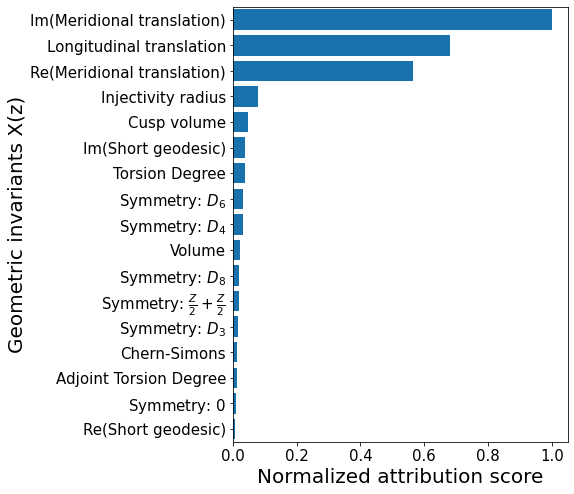

In [10]:
# Saliency Analysis.

train_X = normalize_features(train_df, column_names, add_target=False).to_numpy()
train_y = train_df[target].to_numpy()


saliencies = np.mean(
    np.abs(jax.grad(loss_fn_t.apply, 1)(trained_params, train_X, train_y)), axis=0)


decreasing_saliency = reversed(sorted(zip(saliencies, display_name_from_short_name.values())))
sorted_saliencies, sorted_columns = zip(*decreasing_saliency)

fig, ax = plt.subplots(figsize=(6,8))
sns.barplot(y=np.array(sorted_columns),
            x=np.array(sorted_saliencies) / max(sorted_saliencies),
            color="#0077c6");

ax.tick_params(labelsize=15);
ax.set_ylabel('Geometric invariants X(z)', fontsize=20);
plt.xlabel('Normalized attribution score', fontsize=20);

In [11]:
# Confirming the Feature Saliency.

# To confirm the results of the saliency analysis, we re-train the network with
# only these three features as input to the network.
salient_column_names = ['longitudinal_translation',
                        'meridinal_translation_imag',
                        'meridinal_translation_real']
target = 'signature'

In [12]:
# Confirming the Feature Saliency: Network Setup....(re-run before re-training).

train_X, train_y = get_batch(normed_train_df, salient_column_names, batch_size)

init_params_salient = loss_fn_t.init(rng, train_X, train_y)

opt_init_salient, opt_update_salient = optax.adam(learning_rate)
opt_state_salient = opt_init(init_params_salient)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/base.py:497: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  param = init(shape, dtype)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(tree

In [13]:
# Confirming the Feature Saliency: Network Training.
# Re-train the network using only the most salient features.

@jax.jit
def update_salient(params, opt_state, batch_X, batch_y):
  grads = jax.grad(loss_fn_t.apply)(params, batch_X, batch_y)
  upds, new_opt_state = opt_update_salient(grads, opt_state)
  new_params = optax.apply_updates(params, upds)
  return new_params, new_opt_state


trained_params_salient = train(salient_column_names, init_params_salient,
                               opt_state_salient, update_salient)

# Print the test accuracy. This should be very similar to the test accuracy in
# the case that all columns / invariants are included, demonstrating that most
# of the predictve information about the signature is contained in the three
# selected invariants.

test_X, test_y = get_batch(normed_test_df, salient_column_names)

# The final below accuracy should be in the low 80%s, probably 0.8 -> 0.85
print("Test Accuracy: ",
      np.mean((predict(trained_params_salient, test_X) - test_y) == 0))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tr

Step count: 0
Train loss: 2.3174233436584473
Validation loss: 2.3273274898529053


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 100
Train loss: 0.55498868227005
Validation loss: 0.6478407382965088


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 200
Train loss: 0.5516765117645264
Validation loss: 0.5138936638832092


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 300
Train loss: 0.33580413460731506
Validation loss: 0.47438058257102966


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 400
Train loss: 0.4204997420310974
Validation loss: 0.45582354068756104


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 500
Train loss: 0.3201678395271301
Validation loss: 0.4456839859485626


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 600
Train loss: 0.3763321042060852
Validation loss: 0.4337739944458008


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 700
Train loss: 0.3217320442199707
Validation loss: 0.4163856506347656


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)


Step count: 800
Train loss: 0.3128807544708252
Validation loss: 0.407887727022171


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tree_unflatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_unflatten instead.
  return jax.tree_unflatten(treedef, leaves)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:144: FutureWarning: jax.tree_flatten is deprecated, and will be removed in a future release. Use jax.tree_util.tree_flatten instead.
  leaves, treedef = jax.tree_flatten(tree)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/haiku/_src/data_structures.py:145: FutureWarning: jax.tr

Step count: 900
Train loss: 0.3205811381340027
Validation loss: 0.4461052417755127
Validation loss increased. Stopping!
Test Accuracy:  0.8080672


In [14]:
# Slope vs. Signature: Proposed Linear Relationship.

# The quantity we proposed was the "natural slope", given by
# real(longitudinal_translation / meridinal_translation). We show that
# this is approximately twice the signature (up to a correction term based on
# other hyperbolic invariants) which we can check by comparing the predictions
# made by this rule to those made by the previously trained models.


def predict_signature_from_slope(data_X, min_signature, max_signature):
  meridinal_translation = (
      data_X['meridinal_translation_real'] +
      1j * data_X['meridinal_translation_imag'])
  slope = data_X['longitudinal_translation'] / meridinal_translation
  return slope.real / 2

Text(0, 0.5, 'Signature')

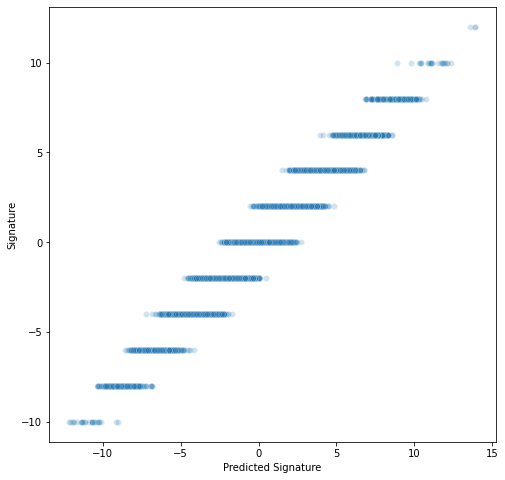

In [15]:
# Proposed Linear Relationship: Scatter plot.
# Scatter plot of the slope against predicted signature.

predictions = [
    predict_signature_from_slope(x, min_signature, max_signature)
    for _, x in test_df.iterrows()
]

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    x=predictions, y=test_df[target], alpha=0.2)
ax.set_xlabel('Predicted Signature')
ax.set_ylabel('Signature')

In [16]:
# Proposed Linear Relationship: Test Accuracy.


# In order to compute the "test accuracy" in the same way as before, we quantize
# the predicted signature values to even integers, between min_signature and
# max_signature.

def quantize(x, min_signature, max_signature):
  return min(max(2 * round(x / 2), min_signature), max_signature)


quantized_predictions = [
    quantize(x, min_signature, max_signature) for x in predictions
]

In [17]:
# The below accuracy will probably be lower than the previous ~80%, but not by much, likely still >70%

print("Test Accuracy: ", np.mean(test_df[target] - quantized_predictions == 0))

Test Accuracy:  0.738192917391447
